# Data Preprocessing

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [ ]:
# Loading the Tesla stock dataset into a DataFrame
Tesla = pd.read_csv('Tesla.csv')

In [ ]:
# Displaying the Dataset
Tesla

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
# Checking the number of rows and columns in the dataset
Tesla.shape

(1692, 7)

In [ ]:
# Listing all column names in the dataset
Tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
# Displaying first few default rows of the Tesla Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
# Rounding all float columns to 4 decimal places for consistency
float_columns = Tesla.select_dtypes(include=['float64']).columns
Tesla[float_columns] = Tesla[float_columns].round(4)

In [ ]:
# Displaying the Tesla Dataset
Tesla

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.00,25.00,17.54,23.89,18766300,23.89
1,6/30/2010,25.79,30.42,23.30,23.83,17187100,23.83
2,7/1/2010,25.00,25.92,20.27,21.96,8218800,21.96
3,7/2/2010,23.00,23.10,18.71,19.20,5139800,19.20
4,7/6/2010,20.00,20.00,15.83,16.11,6866900,16.11
...,...,...,...,...,...,...,...
1687,3/13/2017,244.82,246.85,242.78,246.17,3010700,246.17
1688,3/14/2017,246.11,258.12,246.02,258.00,7575500,258.00
1689,3/15/2017,257.00,261.00,254.27,255.73,4816600,255.73
1690,3/16/2017,262.40,265.75,259.06,262.05,7100400,262.05


In [ ]:
# Checking for missing values in each column of the dataset
Tesla.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
# Checking for duplicate rows in the dataset
Tesla.duplicated().sum()

0

# Outlier Detection

In [ ]:
# Displaying the dataset's structure, data types, and non-null counts
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


<Axes: ylabel='Open'>

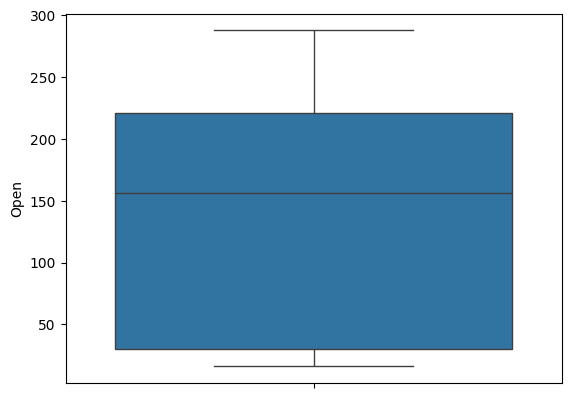

In [ ]:
# Creating a box plot to visualize the distribution of the 'Open' prices
sns.boxplot(Tesla['Open'])

<Axes: ylabel='High'>

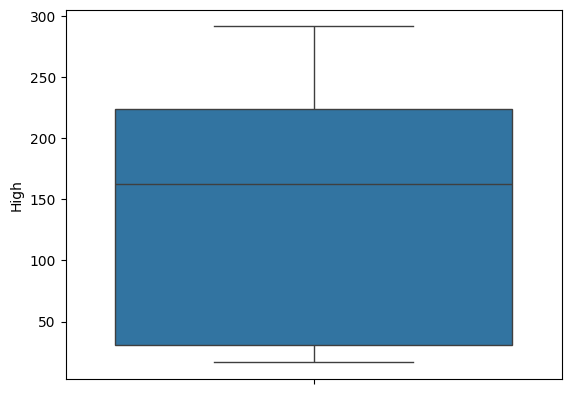

In [ ]:
# Creating a box plot to visualize the distribution of the 'High' prices
sns.boxplot(Tesla['High'])

<Axes: ylabel='Close'>

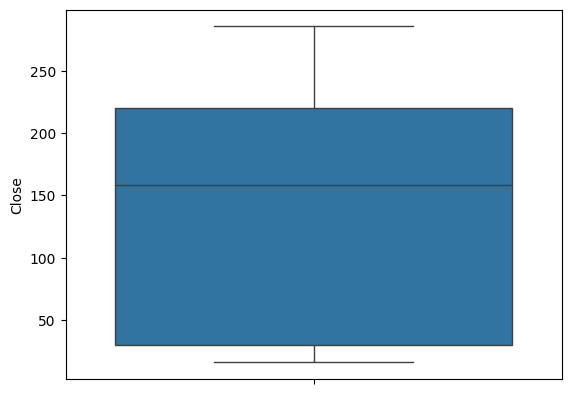

In [ ]:
# Creating a box plot to visualize the distribution of the 'Close' prices
sns.boxplot(Tesla['Close'])

<Axes: ylabel='Adj Close'>

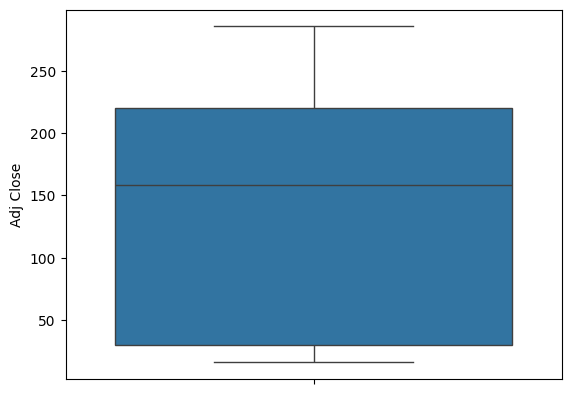

In [ ]:
# Creating a box plot to visualize the distribution of the 'Adj CLose', Adjusted Closing prices
sns.boxplot(Tesla['Adj Close'])

<Axes: ylabel='Volume'>

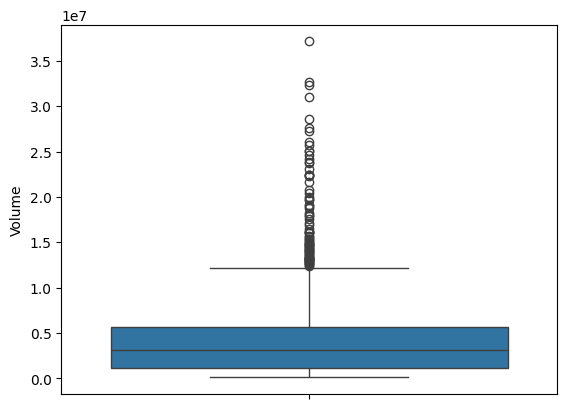

In [ ]:
# Creating a box plot to visualize the distribution of the 'Volume' prices
sns.boxplot(Tesla['Volume'])

In [ ]:
#Maximum Outliers are seen in Volume. So, we will be performing Outlier Detection for 'Volume' using the IQR Method
# Displaying summary statistics for the 'Volume' column
Tesla['Volume'].describe()

,Volume
count,1.692000e+03
mean,4.270741e+06
std,4.295971e+06
min,1.185000e+05
25%,1.194350e+06
50%,3.180700e+06
75%,5.662100e+06
max,3.716390e+07


In [ ]:
# Calculating the Interquartile Range (IQR) and determining the lower and upper bounds for detecting outliers in the 'Volume' column
Q1 = Tesla['Volume'].quantile(0.25)
Q3 = Tesla['Volume'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# (Tesla['Volume'] >= upper_bound).sum()
(Tesla['Volume'] >= upper_bound).sum()

80

In [ ]:
# Filtering the dataset to remove outliers in the 'Volume' column based on the calculated bounds
Tesla = Tesla[(Tesla['Volume'] >= lower_bound) & (Tesla['Volume'] <= upper_bound)]

In [ ]:
# Resetting the index of the dataset and displaying the first few rows after the reset
Tesla = Tesla.reset_index(drop=True)
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/1/2010,25.00,25.92,20.27,21.96,8218800,21.96
1,7/2/2010,23.00,23.10,18.71,19.20,5139800,19.20
2,7/6/2010,20.00,20.00,15.83,16.11,6866900,16.11
3,7/7/2010,16.40,16.63,14.98,15.80,6921700,15.80
4,7/8/2010,16.14,17.52,15.57,17.46,7711400,17.46


In [ ]:
Tesla.shape

(1612, 7)

In [ ]:
# Checking for missing values in the dataset, calculating their percentage, and displaying a summary of columns with missing data
missing_values = Tesla.isnull().sum()
missing_percentages = (missing_values / len(Tesla)) * 100
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage of Total": missing_percentages
}).query("`Missing Values` > 0").sort_values(by="Percentage of Total", ascending=False)
display(missing_summary)

,Missing Values,Percentage of Total


In [ ]:
missing_values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


# EDA

In [ ]:
# Displaying first few columns of the Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/1/2010,25.00,25.92,20.27,21.96,8218800,21.96
1,7/2/2010,23.00,23.10,18.71,19.20,5139800,19.20
2,7/6/2010,20.00,20.00,15.83,16.11,6866900,16.11
3,7/7/2010,16.40,16.63,14.98,15.80,6921700,15.80
4,7/8/2010,16.14,17.52,15.57,17.46,7711400,17.46


In [ ]:
# Checking for sum missing values in the 'Date' column
Tesla['Date'].isna().sum()

0

In [ ]:
# Checking for missing values in the 'Date' column
Tesla['Date'].isna()

,Date
0,False
1,False
2,False
3,False
4,False
...,...
1607,False
1608,False
1609,False
1610,False


<Axes: >

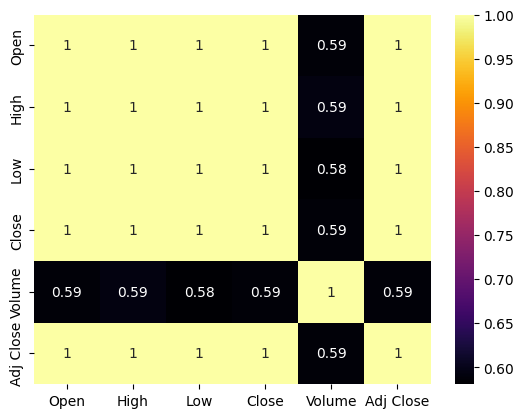

In [ ]:
# Creating a heatmap to visualize the correlation between different stock price columns
sns.heatmap(Tesla[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].corr(), annot=True, cmap='inferno')

In [ ]:
# Converting the 'Date' column to datetime format, invalid dates are set to NaT (Not a Time)
Tesla['Date'] = pd.to_datetime(Tesla['Date'], errors='coerce')

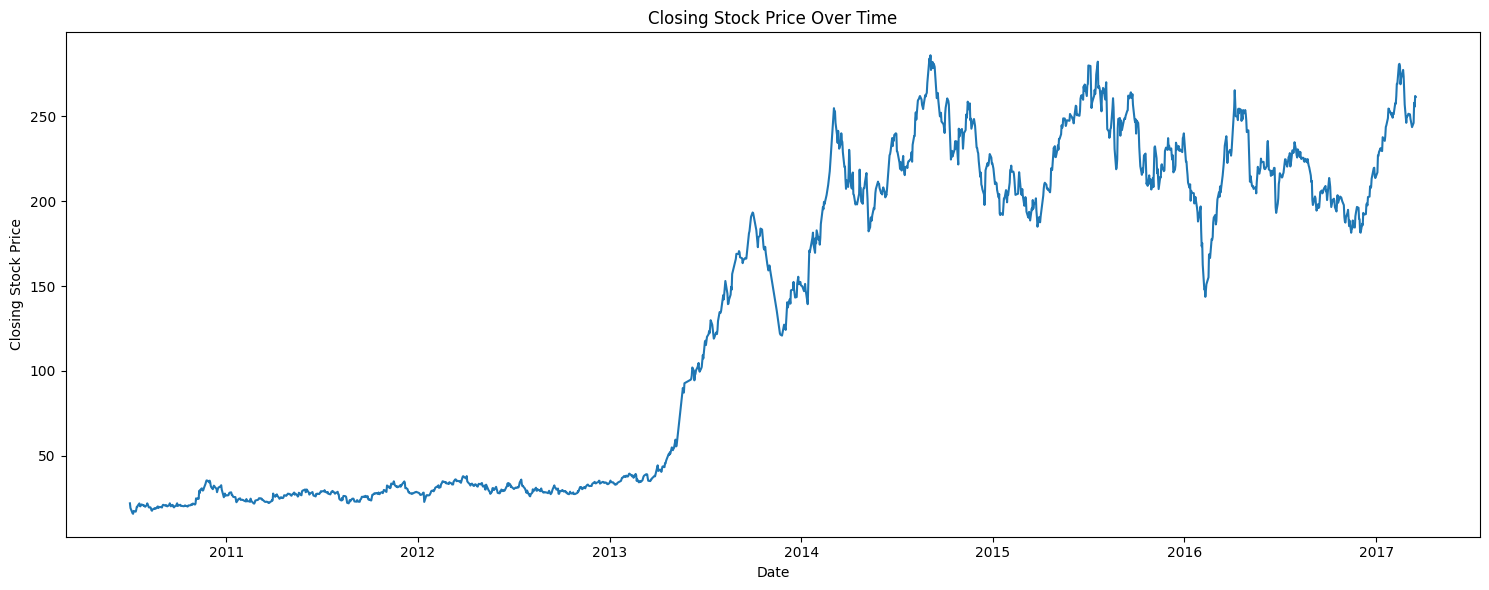

In [ ]:
# Plotting the closing stock price over time with a line plot to visualize trends in Tesla's stock price
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Close', data= Tesla)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.tight_layout()

Text(0, 0.5, 'Closing Stock Price')

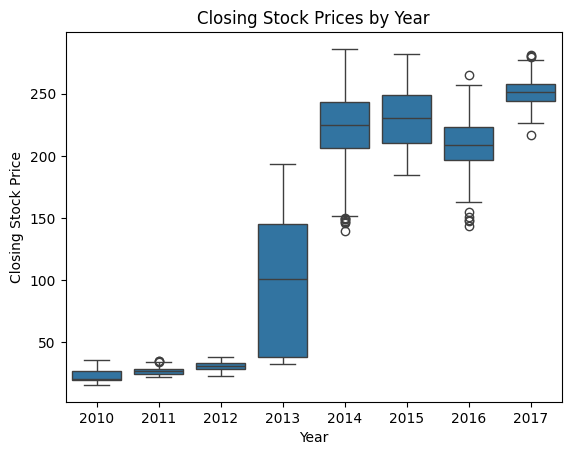

In [ ]:
# Creating a box plot to visualize the distribution of closing stock prices for each year
Tesla['Year'] = Tesla['Date'].dt.year
sns.boxplot(x='Year', y='Close', data=Tesla)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')

Text(0, 0.5, 'Frequency')

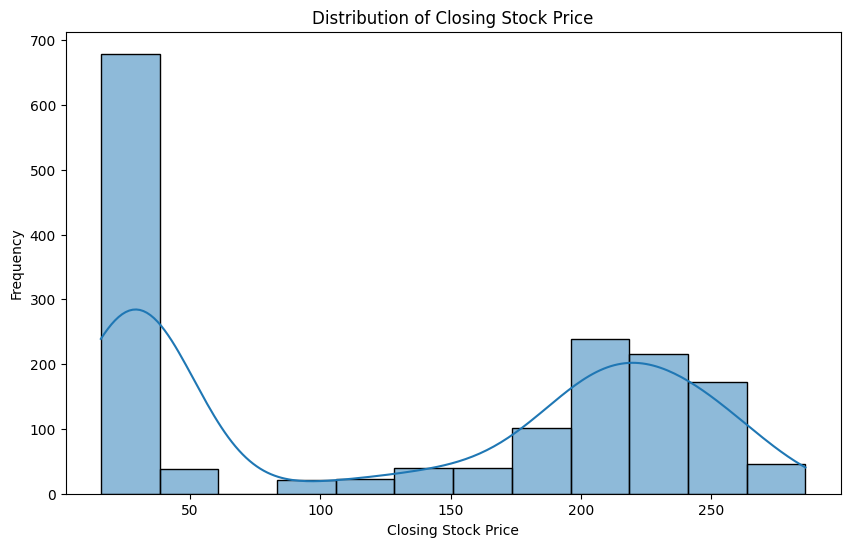

In [ ]:
# Creating a histogram with a KDE to visualize the distribution of closing stock prices
plt.figure(figsize=(10, 6))
sns.histplot(Tesla['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Daily Return')

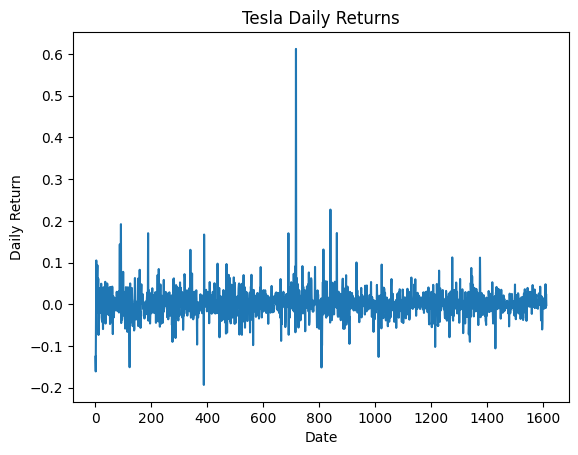

In [ ]:
# Plotting Tesla's daily returns over time to visualize fluctuations in stock price change
daily_returns = Tesla['Close'].pct_change()
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

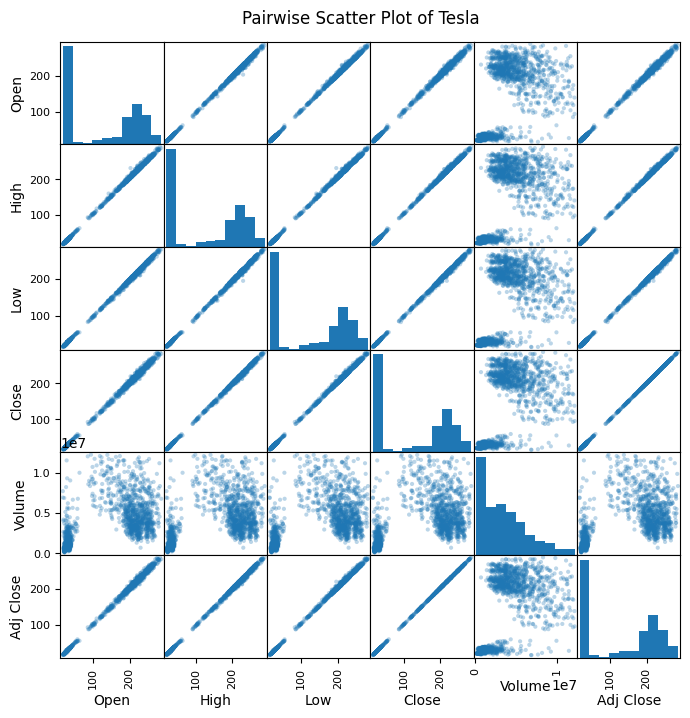

In [ ]:
# Creating a scatter matrix to visualize pairwise relationships between stock price columns for the specified company
def scatter_matrix(stock, company):
    pd.plotting.scatter_matrix(stock, figsize=(8,8), alpha=0.3)
    plt.suptitle(f'Pairwise Scatter Plot of {company}', x=0.5, y=0.92)
    plt.show()
company_name = 'Tesla'
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
scatter_matrix(Tesla[columns], company_name)

In [ ]:
# Importing the AutoCorrelation Function (ACF) plot function to analyze time series dependencies
from statsmodels.graphics.tsaplots import plot_acf

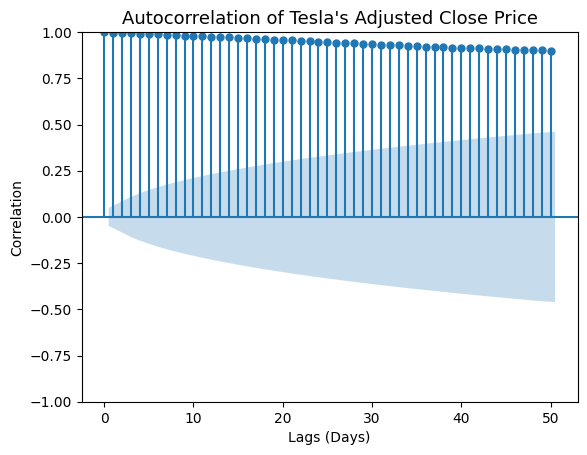

In [ ]:
# Plotting the autocorrelation of Tesla's adjusted close price to analyze the correlation of prices over different lags
def autocorrelation(Tesla):
    plot_acf(Tesla['Adj Close'], lags=50)
    plt.title(f'Autocorrelation of Tesla\'s Adjusted Close Price', fontsize=13)
    plt.xlabel('Lags (Days)', fontsize=10)
    plt.ylabel('Correlation', fontsize=10)
    plt.show()
autocorrelation(Tesla)

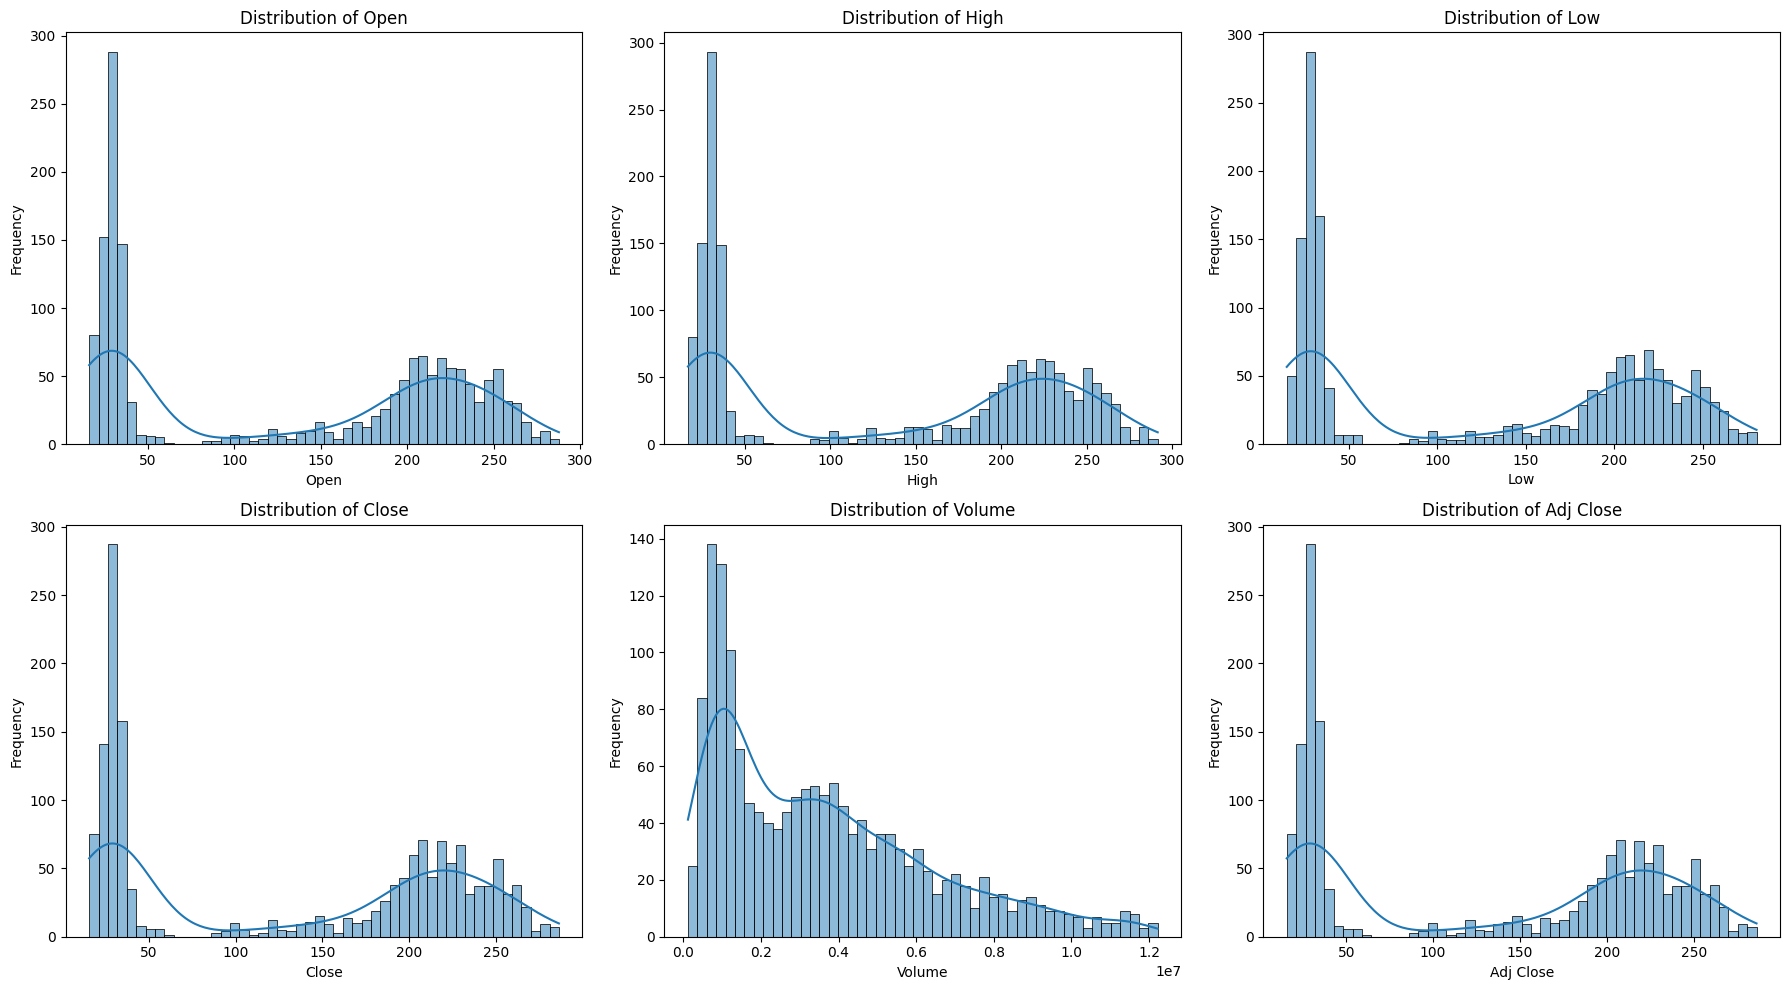

In [ ]:
# Creating histograms with KDE for each selected column to visualize the distribution of stock prices and trading volume
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    sns.histplot(Tesla[col], bins=50, kde=True, ax=ax[row, col_idx])
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)
    ax[row, col_idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Transformation

In [ ]:
# Checking the number of missing values in each column of the Tesla dataset
Tesla.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0
Year,0


In [ ]:
# Importing StandardScaler to standardize the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initializing the StandardScaler to scale the features of the dataset
scaler = StandardScaler()

In [ ]:
# Defining the list of numerical columns to be standardized in the dataset
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [ ]:
# Applying standard scaling to the numerical columns to normalize the data for better model performance
Tesla[numerical_columns] = scaler.fit_transform(Tesla[numerical_columns])

In [ ]:
# Displaying the Dataset
Tesla

,Date,Open,High,Low,Close,Volume,Adj Close,Year
0,2010-07-01,-1.109828,-1.107147,-1.152729,-1.141416,1.656233,-1.141416,2010
1,2010-07-02,-1.130764,-1.136248,-1.169303,-1.170297,0.555988,-1.170297,2010
2,2010-07-06,-1.162168,-1.168240,-1.199899,-1.202632,1.173147,-1.202632,2010
3,2010-07-07,-1.199852,-1.203017,-1.208930,-1.205876,1.192729,-1.205876,2010
4,2010-07-08,-1.202574,-1.193833,-1.202662,-1.188505,1.474920,-1.188505,2010
...,...,...,...,...,...,...,...,...
1607,2017-03-13,1.191228,1.172796,1.211190,1.204774,-0.204822,1.204774,2017
1608,2017-03-14,1.204732,1.289100,1.245611,1.328566,1.426357,1.328566,2017
1609,2017-03-15,1.318727,1.318821,1.333258,1.304812,0.440496,1.304812,2017
1610,2017-03-16,1.375254,1.367840,1.384147,1.370946,1.256586,1.370946,2017


In [ ]:
# Importing matplotlib for data visualization and enabling inline plotting for Jupyter notebooks
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Histograms of Numerical Features')

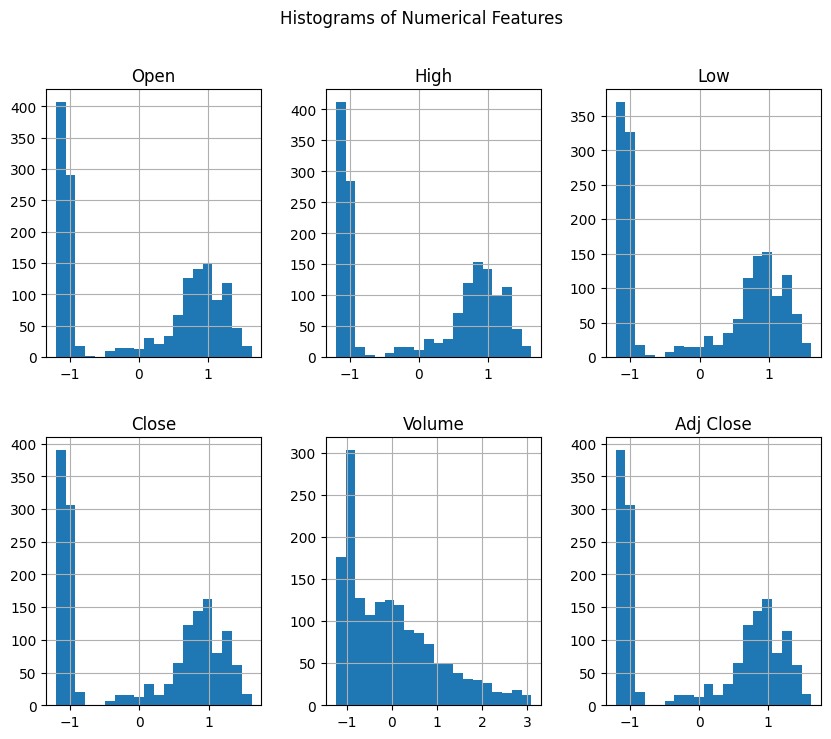

In [ ]:
# Plotting histograms for numerical features in the dataset to visualize their distributions
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns].hist(bins=20, figsize=(10, 8), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')

# Min Max Scaling

In [ ]:
# Importing MinMaxScaler to scale features to a specific range, typically between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Applying Min-Max scaling to the numerical columns to scale them between 0 and 1
min_max = MinMaxScaler()
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns] = min_max.fit_transform(Tesla[numerical_columns])

In [ ]:
# Displaying first few rows of the Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year
0,2010-07-01,0.032630,0.033808,0.019931,0.022795,0.669098,0.022795,2010
1,2010-07-02,0.025264,0.023545,0.014053,0.012581,0.414768,0.012581,2010
2,2010-07-06,0.014216,0.012264,0.003202,0.001147,0.557429,0.001147,2010
3,2010-07-07,0.000958,0.000000,0.000000,0.000000,0.561955,0.000000,2010
4,2010-07-08,0.000000,0.003239,0.002223,0.006143,0.627186,0.006143,2010


In [ ]:
# Scaling the numerical columns using Min-Max normalization to transform values between 0 and 1
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns] = min_max.fit_transform(Tesla[numerical_columns])

Text(0.5, 0.98, 'Histograms of MinMax Scaled Numerical Features')

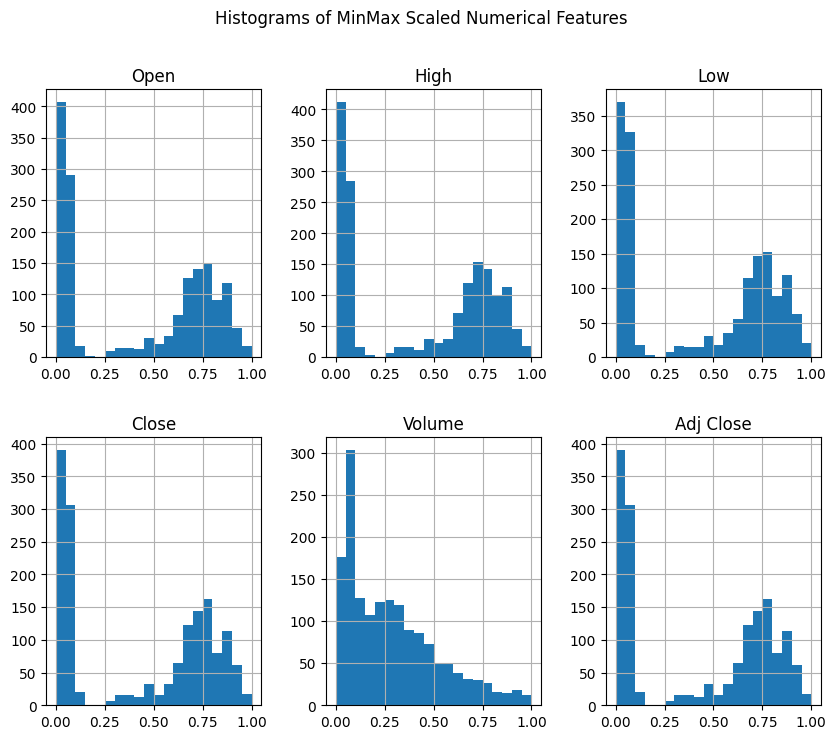

In [ ]:
# Plotting histograms of the Min-Max scaled numerical features to visualize their distributions after scaling
Tesla[numerical_columns].hist(bins=20, figsize=(10, 8), layout=(2, 3))
plt.suptitle('Histograms of MinMax Scaled Numerical Features')

# Robust Scaler

In [ ]:
# Importing RobustScaler to scale features using the median and interquartile range, making it less sensitive to outliers
from sklearn.preprocessing import RobustScaler

In [ ]:
# Initializing the RobustScaler to scale features using the median and interquartile range
robust_scaler = RobustScaler()

In [ ]:
# Applying RobustScaler to the numerical columns to scale them based on the median and interquartile range
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns] = robust_scaler.fit_transform(Tesla[numerical_columns])

In [ ]:
# Displaying the first few rows of Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year
0,2010-07-01,-0.679783,-0.677816,-0.691405,-0.691872,1.281024,-0.691872,2010
1,2010-07-02,-0.690228,-0.692317,-0.699654,-0.706324,0.522612,-0.706324,2010
2,2010-07-06,-0.705895,-0.708257,-0.714882,-0.722505,0.948027,-0.722505,2010
3,2010-07-07,-0.724695,-0.725585,-0.719377,-0.724128,0.961525,-0.724128,2010
4,2010-07-08,-0.726053,-0.721009,-0.716257,-0.715436,1.156042,-0.715436,2010


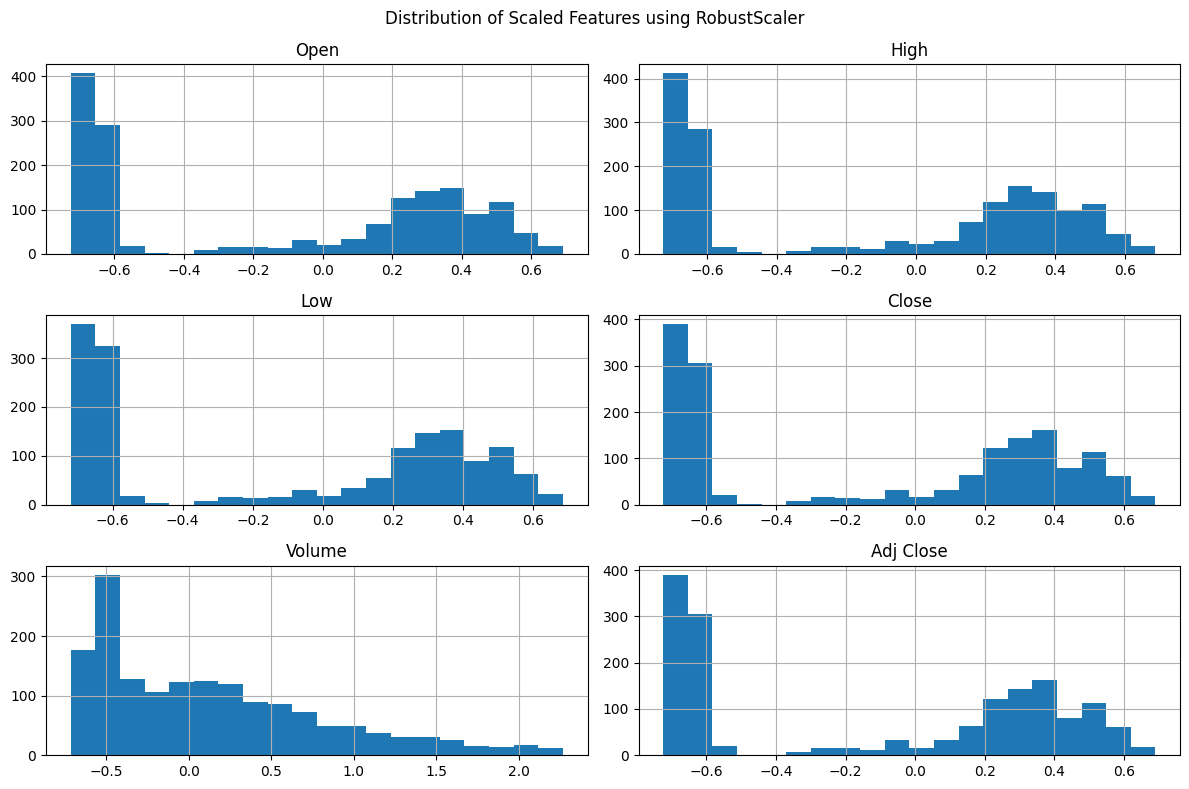

In [ ]:
# Plotting histograms of the features after scaling with RobustScaler to visualize their distributions
Tesla[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Scaled Features using RobustScaler')
plt.tight_layout()

# Gaussian Transformation

In [ ]:
# Importing PowerTransformer to apply power transformation for making data more Gaussian-like
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Initializing the PowerTransformer to apply power transformation to the dataset for normalization
power_transformer = PowerTransformer()

In [ ]:
# Applying PowerTransformer to the numerical columns to normalize the data and make it more Gaussian-like
Tesla[numerical_columns] = power_transformer.fit_transform(Tesla[numerical_columns])

In [ ]:
# Displaying the first few rows of Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205,2010
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648,2010
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200,2010
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161,2010
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296,2010


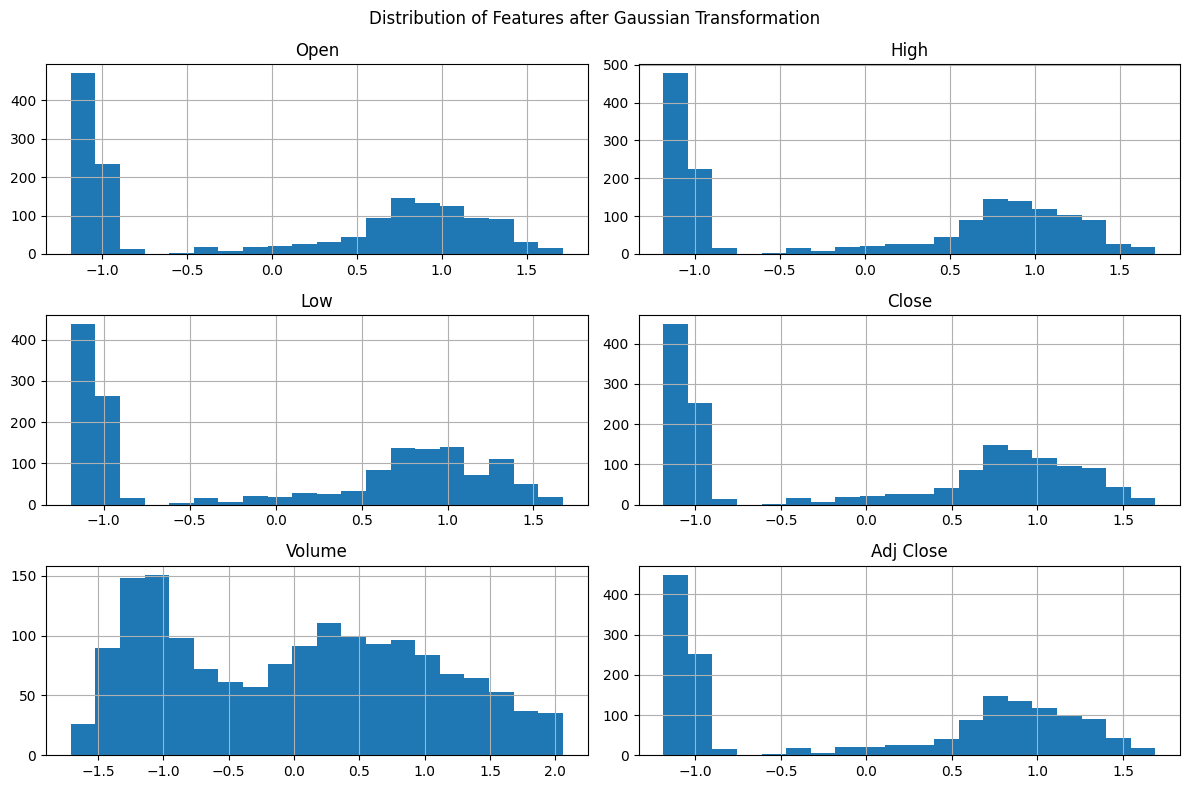

In [ ]:
# Plotting histograms of the features after applying the PowerTransformer for Gaussian-like distribution
Tesla[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Features after Gaussian Transformation')
plt.tight_layout()

In [ ]:
# Importing the scipy.stats library for statistical functions and tests
import scipy.stats as stats

Text(0.5, 1.0, 'Probability Plot for Tesla Features after Gaussian Transformation')

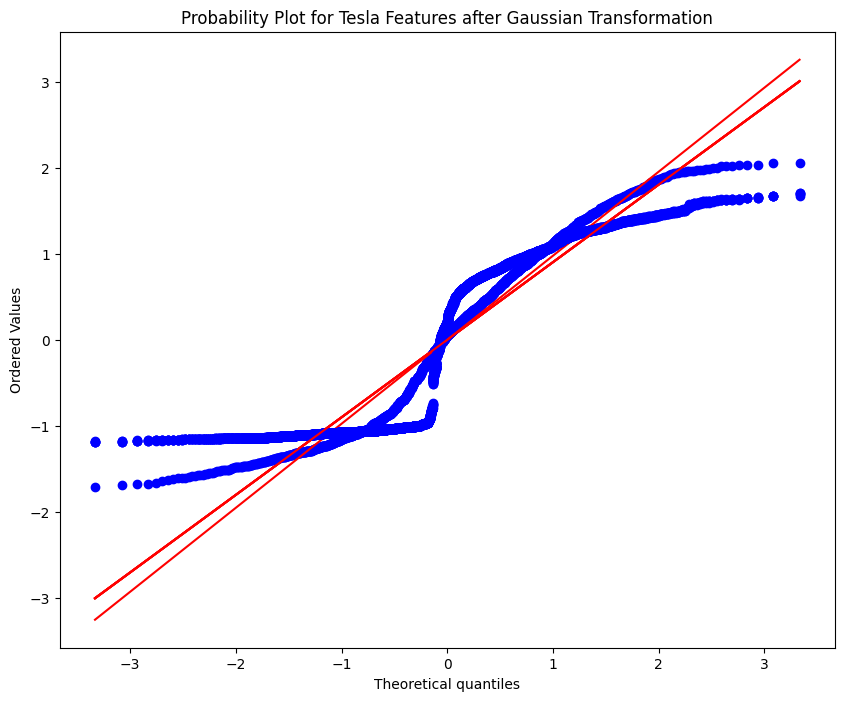

In [ ]:
# Creating probability plots for each numerical feature to assess if they follow a normal distribution after transformation
plt.figure(figsize=(10, 8))
for col in numerical_columns:
    stats.probplot(Tesla[col], dist="norm", plot=plt)
plt.title('Probability Plot for Tesla Features after Gaussian Transformation')

# Feature Engineering

In [ ]:
# Creating a copy of the Tesla dataset for feature transformation to avoid modifying the original dataset
Tesla = Tesla.copy()

In [ ]:
# Applying log transformation to the 'Close' column to reduce skewness and create a 'Log_Close' feature
Tesla['Log_Close'] = np.log1p(Tesla['Close'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Converting the 'Date' column to datetime format for easier manipulation and analysis of time-related data
Tesla['Date'] = pd.to_datetime(Tesla['Date'])

In [ ]:
# Extracting the hour, day, and weekday from the 'Date' column to create new time-related features
Tesla['Hour'] = Tesla['Date'].dt.hour
Tesla['Day'] = Tesla['Date'].dt.day
Tesla['Weekday'] = Tesla['Date'].dt.weekday

In [ ]:
# Extracting the month, quarter, and year from the 'Date' column to create additional time-related features
Tesla['Month'] = Tesla['Date'].dt.month
Tesla['Quarter'] = Tesla['Date'].dt.quarter
Tesla['Year'] = Tesla['Date'].dt.year

In [ ]:
# Creating categorical bins for hours of the day and encoding them into dummy variables to represent different times of day as features
Tesla['Hour_Bin'] = pd.cut(Tesla['Hour'], bins=[0, 6, 12, 18, 24], labels=['LateNight', 'Morning', 'Afternoon', 'Evening'])
Tesla = pd.get_dummies(Tesla, columns=['Hour_Bin'], drop_first=True)

# Rare Category Handling

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

In [ ]:
# Rare Category Handling
def handle_rare_categories(df, columns, threshold=0.01):
    for column in columns:
        category_counts = df[column].value_counts(normalize=True)
        rare_categories = category_counts[category_counts < threshold].index
        df[column] = df[column].replace(rare_categories, 'Rare')
        df[f'Is_Rare_{column}'] = df[column].apply(lambda x: 1 if x == 'Rare' else 0)
    return df

In [ ]:
# Clustering
clustering_data = Tesla[['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Close']].fillna(0)
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

kmeans = KMeans(n_clusters=5, random_state=42, algorithm='elkan')
Tesla['Cluster'] = kmeans.fit_predict(clustering_scaled)

# Dummy encoding for Hour_Bin
Tesla['Hour_Bin'] = pd.cut(Tesla['Hour'], bins=[0, 6, 12, 18, 24], labels=['LateNight', 'Morning', 'Afternoon', 'Evening'])
Tesla = pd.get_dummies(Tesla, columns=['Hour_Bin'], drop_first=True)

# Verify available columns
print("Available columns:", Tesla.columns)
# Identify duplicate columns
duplicates = Tesla.columns[Tesla.columns.duplicated()].unique()
print("Duplicate Columns:", duplicates)

# Drop duplicate columns, keeping the first occurrence
Tesla = Tesla.loc[:, ~Tesla.columns.duplicated()]

# Verify that duplicates are removed
print("Updated Columns:", Tesla.columns)
# Updated categorical columns
categorical_columns_for_rare = ['Cluster', 'Hour_Bin_Morning', 'Hour_Bin_Afternoon', 'Hour_Bin_Evening']

# Handle rare categories
Tesla = handle_rare_categories(Tesla, categorical_columns_for_rare)

# Verify the changes
print(Tesla.head())


Available columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Year',
       'Log_Close', 'Hour', 'Day', 'Weekday', 'Month', 'Quarter',
       'Hour_Bin_Morning', 'Hour_Bin_Afternoon', 'Hour_Bin_Evening', 'Cluster',
       'Hour_Bin_Morning', 'Hour_Bin_Afternoon', 'Hour_Bin_Evening'],
      dtype='object')
Duplicate Columns: Index(['Hour_Bin_Morning', 'Hour_Bin_Afternoon', 'Hour_Bin_Evening'], dtype='object')
Updated Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Year',
       'Log_Close', 'Hour', 'Day', 'Weekday', 'Month', 'Quarter',
       'Hour_Bin_Morning', 'Hour_Bin_Afternoon', 'Hour_Bin_Evening',
       'Cluster'],
      dtype='object')
        Date      Open      High       Low     Close    Volume  Adj Close  \
0 2010-07-01 -1.099935 -1.097001 -1.140501 -1.129205  1.468280  -1.129205   
1 2010-07-02 -1.119098 -1.123471 -1.155782 -1.155648  0.785544  -1.155648   
2 2010-07-06 -1.147797 -1.152511 -1.183957 -1.185200  1.20

In [ ]:
# Resetting the index of the dataset after transformations and displaying the first few rows of the updated dataset
Tesla = Tesla.reset_index(drop=True)
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Log_Close,Hour,...,Month,Quarter,Hour_Bin_Morning,Hour_Bin_Afternoon,Hour_Bin_Evening,Cluster,Is_Rare_Cluster,Is_Rare_Hour_Bin_Morning,Is_Rare_Hour_Bin_Afternoon,Is_Rare_Hour_Bin_Evening
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205,2010,NaN,0,...,7,3,False,False,False,2,0,0,0,0
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648,2010,NaN,0,...,7,3,False,False,False,0,0,0,0,0
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200,2010,NaN,0,...,7,3,False,False,False,2,0,0,0,0
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161,2010,NaN,0,...,7,3,False,False,False,2,0,0,0,0
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296,2010,NaN,0,...,7,3,False,False,False,2,0,0,0,0


In [ ]:
# Importing PolynomialFeatures to generate polynomial features and PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [ ]:
# Defining the selected features to be used for further analysis or modeling, focusing on stock price and trading volume columns
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
# Generating polynomial features of degree 2 for the selected columns to capture interactions and higher-order relationships between them
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(Tesla[selected_features])

In [ ]:
# Creating a DataFrame from the generated polynomial features and naming the columns according to the feature names generated by PolynomialFeatures
poly_feature_names = poly.get_feature_names_out(selected_features)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [ ]:
# Concatenating the polynomial features to the original Tesla dataset to include them as additional features for analysis or modeling
Tesla = pd.concat([Tesla, poly_df], axis=1)

In [ ]:
# Applying PCA (Principal Component Analysis) to reduce the dimensionality of the polynomial features, retaining 10 components for further analysis
pca = PCA(n_components=10)
pca_components = pca.fit_transform(poly_features)

In [ ]:
# Adding the principal components as new features to the Tesla dataset, naming them 'PCA_Component_1', 'PCA_Component_2', etc. for each principal component
for i in range(pca_components.shape[1]):
    Tesla[f'PCA_Component_{i+1}'] = pca_components[:, i]

In [ ]:
# Setting the environment variable 'OMP_NUM_THREADS' to limit the number of threads used by OpenMP (for parallel processing) to 7
import os
os.environ['OMP_NUM_THREADS'] = '7'

In [ ]:
# Importing KMeans for clustering, IsolationForest for anomaly detection, and LocalOutlierFactor for identifying outliers in the dataset
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Selecting relevant features for clustering and filling any missing values with 0 to ensure the dataset is ready for clustering analysis
clustering_data = Tesla[['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Close']].fillna(0)

In [ ]:
# Scaling the selected clustering features using StandardScaler to standardize the data, ensuring each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

In [ ]:
# Performing KMeans clustering with 5 clusters on the scaled data and assigning the cluster labels to the Tesla dataset as a new 'Cluster' column
kmeans = KMeans(n_clusters=5, random_state=42, algorithm='elkan')
cluster_labels = kmeans.fit_predict(clustering_scaled)
Tesla['Cluster'] = cluster_labels

In [ ]:
# Using Isolation Forest for outlier detection, with a contamination rate of 1%, and assigning the outlier scores (1 for inliers and -1 for outliers) to a new 'Iso_Outlier' column in the Tesla dataset
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_scores_iso = iso.fit_predict(clustering_scaled)
Tesla['Iso_Outlier'] = outlier_scores_iso

In [ ]:
# Applying Local Outlier Factor (LOF) for outlier detection with 20 neighbors and a contamination rate of 1%, and assigning the outlier scores (1 for inliers and -1 for outliers) to a new 'LOF_Outlier' column in the Tesla dataset
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_scores_lof = lof.fit_predict(clustering_scaled)
Tesla['LOF_Outlier'] = outlier_scores_lof

# Chi Square Test

In [ ]:
# Chi-Square Test
def perform_chi_square_test(df, categorical_columns, target_column):
    results = []
    for column in categorical_columns:
        if column in df.columns and target_column in df.columns:
            contingency_table = pd.crosstab(df[column], df[target_column])
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            results.append({'Feature': column, 'Chi2': chi2, 'p-value': p, 'DOF': dof})
    return pd.DataFrame(results)

In [ ]:
# Define target column and perform chi-square test
target_variable = 'Iso_Outlier'  # Replace with the desired target variable
chi_square_results_df = perform_chi_square_test(Tesla, categorical_columns_for_rare, target_variable)


In [ ]:
# Output Chi-Square Results
print("Chi-Square Test Results:")
print(chi_square_results_df)

Chi-Square Test Results:
              Feature       Chi2   p-value  DOF
0             Cluster  30.006611  0.000005    4
1    Hour_Bin_Morning   0.000000  1.000000    0
2  Hour_Bin_Afternoon   0.000000  1.000000    0
3    Hour_Bin_Evening   0.000000  1.000000    0


In [ ]:
# Adding rare handling and chi-square information to logs
Tesla['Rare_Handled_Columns'] = len(categorical_columns_for_rare)
Tesla['Chi_Square_Analyzed_Target'] = target_variable

In [ ]:
# Final Dataset Information
print(f"Final Data Shape: {Tesla.shape}")
Tesla.head()

Final Data Shape: (1612, 56)


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Log_Close,Hour,...,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10,Iso_Outlier,LOF_Outlier,Rare_Handled_Columns,Chi_Square_Analyzed_Target
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205,2010,NaN,0,...,-0.112018,-0.023735,0.009511,0.000424,0.056515,-0.042287,1,-1,4,Iso_Outlier
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648,2010,NaN,0,...,0.650944,-0.042187,0.014615,0.004062,0.055106,-0.033270,1,1,4,Iso_Outlier
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200,2010,NaN,0,...,0.254427,-0.038903,0.003645,0.006293,0.066530,-0.024400,1,1,4,Iso_Outlier
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161,2010,NaN,0,...,0.246555,-0.002451,-0.024474,-0.005468,0.010006,0.021026,-1,1,4,Iso_Outlier
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296,2010,NaN,0,...,0.035072,0.020097,-0.025020,-0.009942,-0.024827,0.022167,-1,-1,4,Iso_Outlier


In [ ]:
# Importing Keras and its layers module, along with TensorFlow's layers for building and training neural network models.
import keras
from keras import layers
from tensorflow.keras import layers

In [ ]:
# Prepare Tesla stock data by selecting relevant columns and removing missing values
ae_data = Tesla[['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Close']].dropna()

In [ ]:
# Scale the data to have zero mean and unit variance for better model performance
scaler = StandardScaler()
X = ae_data.values
X_scaled_ae = scaler.fit_transform(X)

In [ ]:
# Define the dimensions for autoencoder architecture (input size and encoded representation size)
input_dim = X_scaled_ae.shape[1]
encoding_dim = 8

In [ ]:
# Create the input layer for the autoencoder with the specified input dimension
input_layer = layers.Input(shape=(input_dim,))

In [ ]:
# Create encoder part with two dense layers to compress the data
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

In [ ]:
# Create decoder part with two dense layers to reconstruct the original data
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

In [ ]:
# Build and train the autoencoder model with MSE loss function
autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
encoder = keras.Model(inputs=input_layer, outputs=encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled_ae, X_scaled_ae, epochs=10, batch_size=256, shuffle=True, verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9607
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8787 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8509 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7665 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7604 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6851 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6006 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5284 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4850 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4275 


In [ ]:
# Using the encoder model to predict and encode the scaled input data (X_scaled_ae) into a lower-dimensional representation using the autoencoder
X_encoded = encoder.predict(X_scaled_ae)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Creating a DataFrame with the encoded features generated by the autoencoder, naming the columns as 'AE_Feature_1', 'AE_Feature_2', etc., based on the encoding dimension and retaining the original index from the data
encoded_cols = [f'AE_Feature_{i+1}' for i in range(encoding_dim)]
encoded_df = pd.DataFrame(X_encoded, index=ae_data.index, columns=encoded_cols)

In [ ]:
# Adding the encoded features from the autoencoder (encoded_df) to the Tesla dataset by joining them, and displaying the first few rows of the updated dataset
Tesla = Tesla.join(encoded_df)
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Log_Close,Hour,...,Rare_Handled_Columns,Chi_Square_Analyzed_Target,AE_Feature_1,AE_Feature_2,AE_Feature_3,AE_Feature_4,AE_Feature_5,AE_Feature_6,AE_Feature_7,AE_Feature_8
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205,2010,NaN,0,...,4,Iso_Outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648,2010,NaN,0,...,4,Iso_Outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200,2010,NaN,0,...,4,Iso_Outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161,2010,NaN,0,...,4,Iso_Outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296,2010,NaN,0,...,4,Iso_Outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Building and training an autoencoder model to extract features and adding the newly generated encoded features to the Tesla dataset
from tensorflow.keras import layers

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
encoder = keras.Model(inputs=input_layer, outputs=encoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_scaled_ae, X_scaled_ae, epochs=10, batch_size=256, shuffle=True, verbose=1)
X_encoded = encoder.predict(X_scaled_ae)

# Add AE features to the dataset
encoded_cols = [f'AE_Feature_{i+1}' for i in range(encoding_dim)]
encoded_df = pd.DataFrame(X_encoded, index=ae_data.index, columns=encoded_cols)
Tesla = Tesla.join(encoded_df, rsuffix='_new', how='left')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0180
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9262 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8859 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8598 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7340 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7374 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6652 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6312 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5505 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4952 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
Tesla = Tesla.reset_index(drop=True)
hour_group = Tesla.groupby(['Day', 'Hour'])['Close'].agg(['mean', 'std', 'count']).reset_index()
# Reset the index of hour_group and flatten the MultiIndex columns
hour_group.columns = ['_'.join(col).strip() if col[1] else col[0] for col in hour_group.columns.values]

# Rename the aggregated columns
hour_group = hour_group.rename(columns={'Close_mean':'Hour_Mean_Close', 'Close_std':'Hour_Std_Close', 'Close_count':'Hour_Count'})

# Specify suffixes to avoid conflicts
Tesla = Tesla.merge(hour_group, on=['Day', 'Hour'], how='left', suffixes=('', '_new'))
# Now you can safely rename or drop the '_new' columns if needed

print("Final Data Shape:", Tesla.shape)
print(Tesla.head())

Final Data Shape: (1612, 78)
        Date      Open      High       Low     Close    Volume  Adj Close  \
0 2010-07-01 -1.099935 -1.097001 -1.140501 -1.129205  1.468280  -1.129205   
1 2010-07-02 -1.119098 -1.123471 -1.155782 -1.155648  0.785544  -1.155648   
2 2010-07-06 -1.147797 -1.152511 -1.183957 -1.185200  1.204288  -1.185200   
3 2010-07-07 -1.182164 -1.184012 -1.192263 -1.188161  1.215908  -1.188161   
4 2010-07-08 -1.184643 -1.175699 -1.186498 -1.172296  1.374387  -1.172296   

   Year  Log_Close  Hour  ...  AE_Feature_5_new  AE_Feature_6_new  \
0  2010        NaN     0  ...               NaN               NaN   
1  2010        NaN     0  ...               NaN               NaN   
2  2010        NaN     0  ...               NaN               NaN   
3  2010        NaN     0  ...               NaN               NaN   
4  2010        NaN     0  ...               NaN               NaN   

   AE_Feature_7_new  AE_Feature_8_new  Hour_Mean_Close  Hour_Std_Close  \
0               NaN

<ipython-input-104-3f7ae7523571>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  hour_group = Tesla.groupby(['Day', 'Hour'])['Close'].agg(['mean', 'std', 'count']).reset_index()


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(Tesla['Hour_Std_Close'].dropna().shape)


(1612, 2)


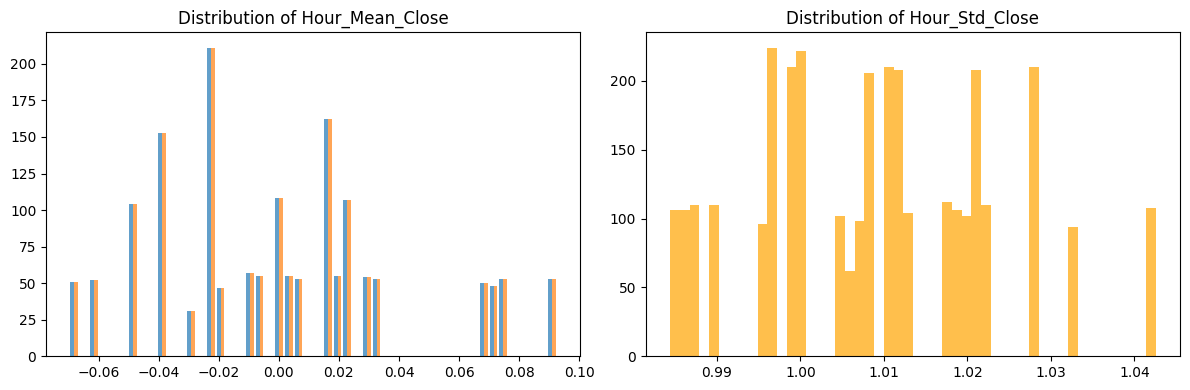

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the histogram for 'Hour_Mean_Close' on the first axis
ax[0].hist(Tesla['Hour_Mean_Close'].dropna(), bins=50, alpha=0.7, label='Hour_Mean_Close')
ax[0].set_title('Distribution of Hour_Mean_Close')

# Plotting the histogram for 'Hour_Std_Close' on the second axis
ax[1].hist(Tesla['Hour_Std_Close'].dropna().to_numpy().flatten(), bins=50, alpha=0.7, label='Hour_Std_Close', color='orange')
ax[1].set_title('Distribution of Hour_Std_Close')

# Display the plot
plt.tight_layout()
plt.show()


# Sprint 2

# **Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load Tesla dataset
Tesla = pd.read_csv('Tesla.csv')

In [ ]:
# Preprocessing: Create a binary target column for classification
Tesla['Target'] = (Tesla['Close'] > Tesla['Open']).astype(int)

In [ ]:
# Select features and target
X = Tesla[['Open', 'High', 'Low', 'Volume']]  # Features
y = Tesla['Target']  # Target variable

In [ ]:
# Handle missing values
Tesla = Tesla.dropna(subset=['Open', 'High', 'Low', 'Volume', 'Close'])

In [ ]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Print training and testing data
print("Training Data (X_train):")
print(X_train.head())
print("\nTraining Labels (y_train):")
print(y_train.head())

Training Data (X_train):
            Open        High         Low    Volume
922   261.250000  261.899994  248.330002  17945800
755   108.570000  109.440002  106.709999   5748600
86     21.139999   21.850000   21.049999    280600
1198  190.229996  193.229996  190.000000   5010400
1189  197.449997  198.990005  195.619995   4269500

Training Labels (y_train):
922     0
755     0
86      1
1198    1
1189    1
Name: Target, dtype: int64


In [ ]:
print("\nTesting Data (X_test):")
print(X_test.head())
print("\nTesting Labels (y_test):")
print(y_test.head())


Testing Data (X_test):
           Open        High         Low    Volume
997  206.759995  225.490005  206.259995  13246400
490   29.809999   29.870001   28.850000    492100
637   34.009998   34.189999   33.400002    698000
786  149.500000  149.839996  144.449997   8748900
554   28.549999   29.570000   28.500000    953200

Testing Labels (y_test):
997    1
490    0
637    0
786    0
554    1
Name: Target, dtype: int64


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression with Grid Search for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

In [ ]:
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the co

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best hyperparameters
print("\nBest Parameters from Grid Search:", grid_search.best_params_)


Best Parameters from Grid Search: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
# Evaluate the model
train_acc = accuracy_score(y_train, best_model.predict(X_train_scaled))
val_acc = accuracy_score(y_val, best_model.predict(X_val_scaled))
test_acc = accuracy_score(y_test, best_model.predict(X_test_scaled))

In [ ]:
print(f"\nTraining Accuracy: {train_acc}")
print(f"Validation Accuracy: {val_acc}")
print(f"Testing Accuracy: {test_acc}")


Training Accuracy: 0.847972972972973
Validation Accuracy: 0.8582677165354331
Testing Accuracy: 0.8503937007874016


In [ ]:
# Classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, best_model.predict(X_test_scaled)))


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       140
           1       0.82      0.86      0.84       114

    accuracy                           0.85       254
   macro avg       0.85      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254



In [ ]:
import pandas as pd

def predict(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]
    preds[preds >= 0.6] = 1
    preds[preds <= 0.4] = 0
    preds = pd.Series(preds, index=X_test.index, name="Predictions")
    combined = pd.concat([y_test.reset_index(drop=True), preds.reset_index(drop=True)], axis=1)
    combined = combined.loc[(combined["Predictions"] == 0.0) | (combined["Predictions"] == 1.0), :]
    return combined

def backtest(X, y, cols, model, start=750, step=250):
    all_predictions = []
    for i in range(start, X.shape[0], step):
        X_train = X[cols].iloc[0:i].copy()
        X_test = X[cols].iloc[i:(i+step)].copy()
        y_train = y.iloc[0:i].copy()
        y_test = y.iloc[i:(i+step)].copy()
        predictions = predict(X_train, X_test, y_train, y_test, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


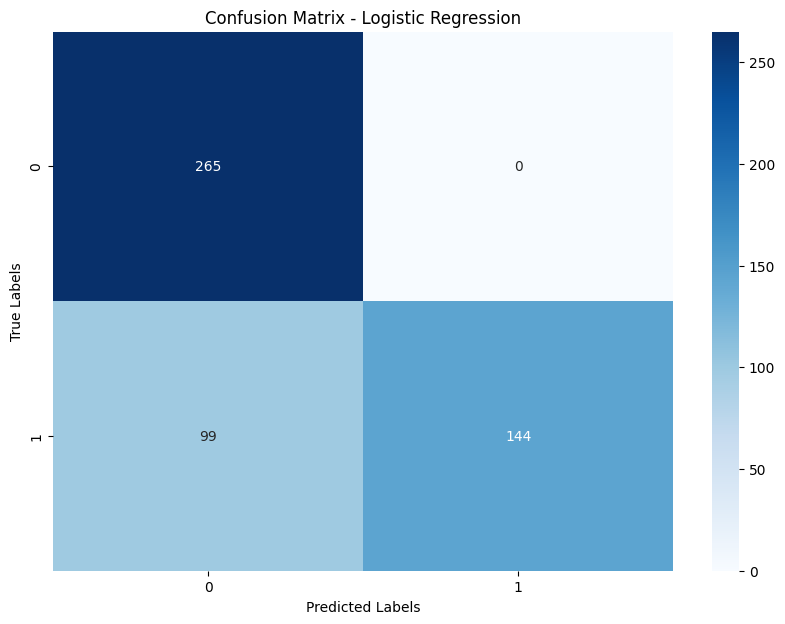

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       265
           1       1.00      0.59      0.74       243

    accuracy                           0.81       508
   macro avg       0.86      0.80      0.79       508
weighted avg       0.86      0.81      0.80       508



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sn

# Load Tesla dataset
tesla_df = pd.read_csv('Tesla.csv')

# Preprocessing: Create a binary target column for classification
tesla_df['Target'] = (tesla_df['Close'] > tesla_df['Open']).astype(int)

# Select features and target
feature_cols = ['Open', 'High', 'Low', 'Close']  # Select features
X = tesla_df[feature_cols]
y = tesla_df['Target']

# Handle missing values
tesla_df = tesla_df.dropna(subset=feature_cols)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_saga = LogisticRegression(solver='saga', random_state=1)
log_saga.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_saga.predict(X_test_scaled)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8051181102362205

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       265
           1       1.00      0.59      0.74       243

    accuracy                           0.81       508
   macro avg       0.86      0.80      0.79       508
weighted avg       0.86      0.81      0.80       508



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)  # Ensure X_train_scaled and y_train are defined


LogisticRegression()

In [ ]:
# Optional: Predict probabilities for each class
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test_scaled)
print("\nPredicted Probabilities (first 5):")
print(y_pred_prob[:5])


Predicted Probabilities (first 5):
[[0.85067585 0.14932415]
 [0.85529437 0.14470563]
 [0.90743177 0.09256823]
 [0.99256881 0.00743119]
 [0.13986196 0.86013804]]


In [ ]:
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_accuracy.mean():.4f}")



Cross-Validation Accuracy: 0.7905


## SVM


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Convert the dictionary to a dataframe
Tesla = pd.DataFrame(Tesla)

# Preprocessing
Tesla['Date'] = pd.to_datetime(Tesla['Date'])  # Convert date to datetime
Tesla['Date'] = Tesla['Date'].map(pd.Timestamp.toordinal)  # Convert datetime to ordinal

# Define features and target variables
X = Tesla[['Date', 'Open', 'High', 'Low', 'Volume']].values  # Features

# Convert target variable to binary classification: e.g., 'Close' above or below median
median_close = Tesla['Close'].median()
y = (Tesla['Close'] > median_close).astype(int).values  # 1 if above median, else 0

# Check for consistency
assert len(X) == len(y), "Feature matrix X and target vector y have inconsistent lengths!"

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
model = SVC(kernel='rbf', C=100, gamma=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display predictions
print("Predictions:", y_pred)



Accuracy: 0.9970501474926253
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       179
           1       1.00      0.99      1.00       160

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

Predictions: [1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 

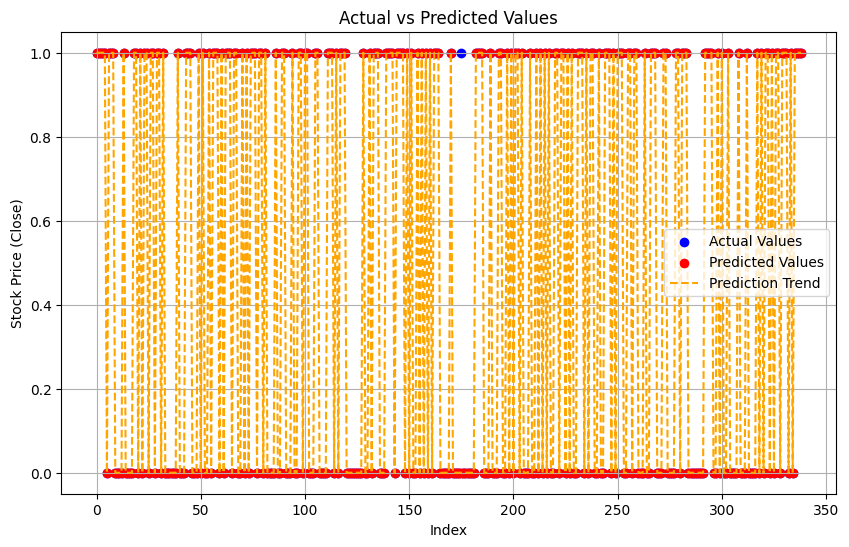

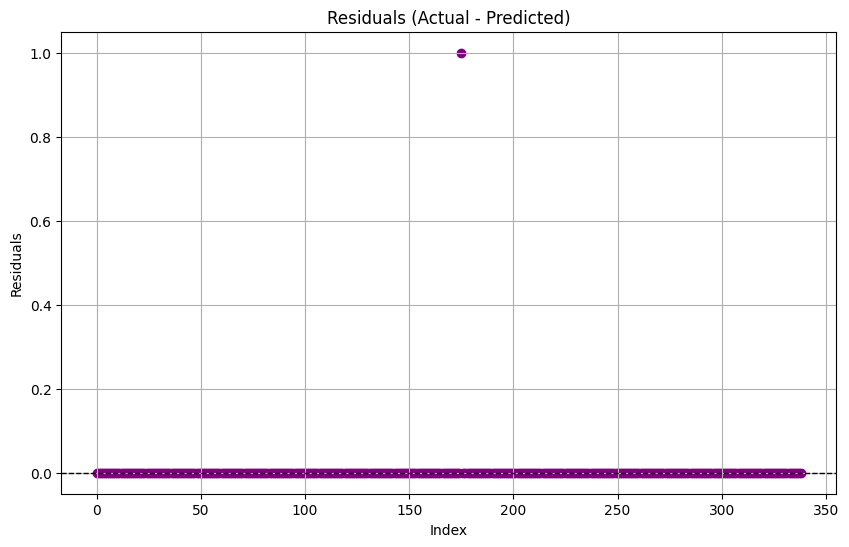

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values')
plt.plot(range(len(y_test)), y_pred, color='orange', linestyle='dashed', label='Prediction Trend')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='purple')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the SVR model
svc = SVC()

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']  # Add 'linear' for comparison
}

# GridSearchCV with cross-validation
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3, cv=5)
svc_f = grid.fit(X_train, y_train)

# Make predictions
svc_p = svc_f.predict(X_test)

# Evaluate metrics
mse = mean_squared_error(y_test, svc_p)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svc_p)

print(f"Best Parameters: {grid.best_params_}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.989 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.989 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.974 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

## XGBoost

Mean Squared Error: 5.242259442847153


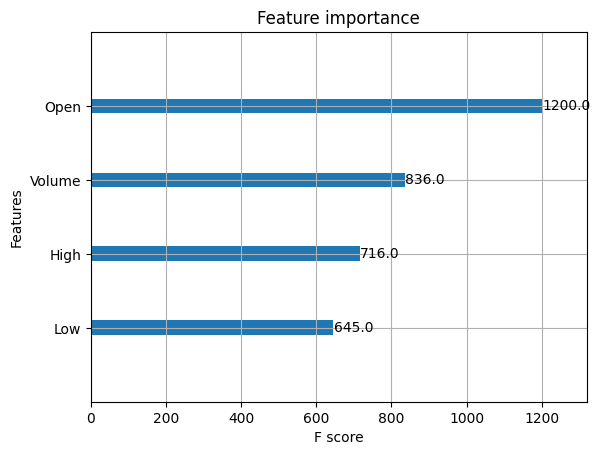

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your Tesla dataset
Tesla = pd.read_csv('Tesla.csv')

# Convert Date column to datetime
Tesla['Date'] = pd.to_datetime(Tesla['Date'])

# You can choose the target variable; for example, predict 'Close' price
X = Tesla[['Open', 'High', 'Low', 'Volume']]  # Features (excluding Date and 'Adj Close')
y = Tesla['Close']  # Target variable (you can change this as needed)

# Encode categorical variables if any (e.g., if you had categorical columns)
# In this case, there are no categorical columns, but if needed:
# encoder = LabelEncoder()
# Tesla['CategoricalColumn'] = encoder.fit_transform(Tesla['CategoricalColumn'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optional: Feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


In [ ]:

# 1. Making Predictions on the Test Set
predictions = model.predict(X_test)

# Print the first 5 predictions from the test set
print(f"Predictions on Test Set: {predictions[:5]}")

# 2. Evaluate the model on the test set (optional)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Set: {mse}")

# 3. Inference on New Data (single data point)
# Example of new data for prediction
new_data = pd.DataFrame({
    'Open': [250.0],
    'High': [255.0],
    'Low': [245.0],
    'Volume': [5000000]
})

# Predict on the new data
new_prediction = model.predict(new_data)
print(f"Prediction for New Data (Close Price): {new_prediction[0]}")

# You can also make predictions for multiple new inputs:
# Example of multiple new data points for prediction
new_data_multiple = pd.DataFrame({
    'Open': [250.0, 260.0, 270.0],
    'High': [255.0, 265.0, 275.0],
    'Low': [245.0, 255.0, 265.0],
    'Volume': [5000000, 6000000, 7000000]
})

# Predict for multiple new data points
predictions_multiple = model.predict(new_data_multiple)
print(f"Predictions for Multiple New Data Points: {predictions_multiple}")


Predictions on Test Set: [201.2533  218.13135 229.57812 196.9352  225.65492]
Mean Squared Error on Test Set: 5.242259442847153
Prediction for New Data (Close Price): 249.33424377441406
Predictions for Multiple New Data Points: [249.33424 258.92007 273.6923 ]


Accuracy: 0.7551622418879056
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       183
           1       0.72      0.76      0.74       156

    accuracy                           0.76       339
   macro avg       0.75      0.76      0.75       339
weighted avg       0.76      0.76      0.76       339

Predicted Probabilities (first 5): [[0.7562828  0.24371718]
 [0.96318454 0.03681547]
 [0.50351024 0.4964898 ]
 [0.8229836  0.1770164 ]
 [0.5042289  0.4957711 ]]


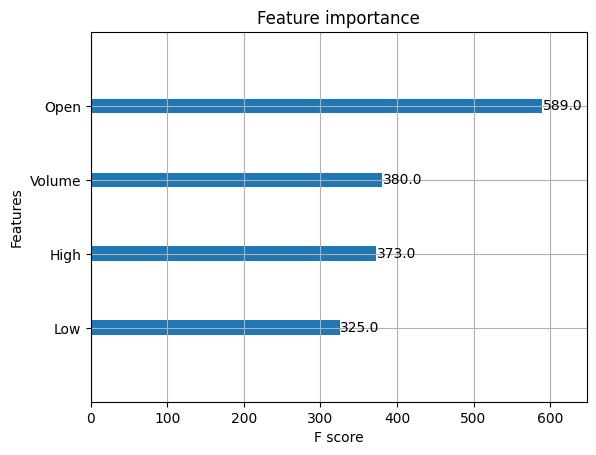

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your Tesla dataset
Tesla = pd.read_csv('Tesla.csv')

# Preprocessing: Create a binary target column for classification
Tesla['Target'] = (Tesla['Close'] > Tesla['Open']).astype(int)  # 1 if Close > Open, else 0

# Select features and target
X = Tesla[['Open', 'High', 'Low', 'Volume']]  # Features
y = Tesla['Target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Predict probabilities for each class
y_pred_prob = model.predict_proba(X_test)
print(f"Predicted Probabilities (first 5): {y_pred_prob[:5]}")

# Optional: Feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()



In [ ]:
import unittest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import accuracy_score, r2_score

class TestTeslaStockModels(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        # Initialize models and variables for all tests
        global X_train_scaled, X_test_scaled, X_train, X_test, y_train, y_test

        # Logistic Regression
        cls.log_reg = LogisticRegression()
        cls.log_reg.fit(X_train_scaled, y_train)
        cls.val_acc_log = cls.log_reg.score(X_test_scaled, y_test)

        # Support Vector Machine
        cls.svm = SVR()
        cls.svm.fit(X_train_scaled, y_train)
        cls.val_acc_svm = r2_score(y_test, cls.svm.predict(X_test_scaled))

        # XGBoost
        cls.xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
        cls.xgb_model.fit(X_train, y_train)
        cls.val_acc_xgb = r2_score(y_test, cls.xgb_model.predict(X_test))

    def test_data_splitting(self):
        self.assertEqual(len(X_train) + len(X_test), len(X), "Data splitting is incorrect!")

    def test_feature_scaling(self):
        self.assertAlmostEqual(X_train_scaled.mean(), 0, delta=1e-6, msg="Feature scaling mean is incorrect!")
        self.assertAlmostEqual(X_train_scaled.std(), 1, delta=1e-6, msg="Feature scaling variance is incorrect!")

    def test_model_training(self):
        self.assertEqual(self.log_reg.coef_.shape[1], X_train_scaled.shape[1], "Logistic Regression training failed!")
        self.assertGreater(len(self.svm.support_), 0, "SVM training failed!")
        self.assertGreater(self.xgb_model.n_features_in_, 0, "XGBoost training failed!")

    def test_predictions_shape(self):
        y_pred_log = self.log_reg.predict(X_test_scaled)
        y_pred_xgb = self.xgb_model.predict(X_test)
        self.assertEqual(len(y_pred_log), len(y_test), "Logistic Regression predictions shape mismatch!")
        self.assertEqual(len(y_pred_xgb), len(y_test), "XGBoost predictions shape mismatch!")

    def test_validation_accuracy(self):
        self.assertTrue(0 <= self.val_acc_log <= 1, "Validation accuracy for Logistic Regression out of range!")
        self.assertTrue(-1 <= self.val_acc_svm <= 1, "Validation R2 for SVM out of range!")
        self.assertTrue(-1 <= self.val_acc_xgb <= 1, "Validation R2 for XGBoost out of range!")

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.265s

OK


## Optuna and Hyperopt Optimization

In [ ]:
!pip install optuna
!pip install hyperopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import optuna
from hyperopt import hp, tpe, fmin, Trials

# Load the Tesla dataset
df = pd.read_csv('Tesla.csv')

# Ensure 'Target_class' column is defined based on 'Adj Close' and 'Open'
df['Target_class'] = (df['Adj Close'] > df['Open']).astype(int)

# For regression problem, use 'Adj Close' as the target variable
y_regression = df['Adj Close']  # Target for regression problem
y_classification = df['Target_class']  # Target for classification problem

# Drop the 'Date' column (or convert to numeric if needed)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = (df['Date'] - df['Date'].min()).dt.days  # Convert to days since the first date

# Features
X = df.drop(['Target_class'], axis=1)  # Drop the classification target for regression

# Train-test split (same split for both targets)
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Feature scaling for classifiers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure the regression target is aligned with train-test split:
y_train_regression = y_regression.loc[X_train.index]
y_test_regression = y_regression.loc[X_test.index]


# Optimization Objective Functions for Optuna and Hyperopt
def objective_logreg_classification(trial):
    # Hyperparameters for Logistic Regression
    C = trial.suggest_loguniform('C', 1e-5, 1e5)  # Regularization strength
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    model = LogisticRegression(C=C, solver=solver, random_state=42)
    model.fit(X_train_scaled, y_train_classification)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_classification, y_pred)
    return accuracy

def objective_svm_classification(trial):
    # Hyperparameters for SVM
    C = trial.suggest_loguniform('C', 1e-5, 1e5)  # Regularization parameter
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])

    model = SVC(C=C, kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train_classification)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_classification, y_pred)
    return accuracy

def objective_xgb_classification(trial):
    # Hyperparameters for XGBoost
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)

    model = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    model.fit(X_train_scaled, y_train_classification)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_classification, y_pred)
    return accuracy

# Optimization function for Hyperopt
def objective_logreg_classification_hyperopt(params):
    C = params['C']
    solver = params['solver']

    model = LogisticRegression(C=C, solver=solver, random_state=42)
    model.fit(X_train_scaled, y_train_classification)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_classification, y_pred)
    return -accuracy  # Hyperopt minimizes the objective function

def objective_svm_classification_hyperopt(params):
    C = params['C']
    kernel = params['kernel']

    model = SVC(C=C, kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train_classification)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_classification, y_pred)
    return -accuracy  # Hyperopt minimizes the objective function

def objective_xgb_classification_hyperopt(params):
    learning_rate = params['learning_rate']
    max_depth = params['max_depth']
    n_estimators = params['n_estimators']

    model = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    model.fit(X_train_scaled, y_train_classification)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_classification, y_pred)
    return -accuracy  # Hyperopt minimizes the objective function

# Optimization for Optuna
def optimize_models_optuna():
    study_logreg = optuna.create_study(direction='maximize')
    study_logreg.optimize(objective_logreg_classification, n_trials=100)

    study_svm = optuna.create_study(direction='maximize')
    study_svm.optimize(objective_svm_classification, n_trials=100)

    study_xgb = optuna.create_study(direction='maximize')
    study_xgb.optimize(objective_xgb_classification, n_trials=100)

    print(f'Best LogReg Trial: {study_logreg.best_trial.params}')
    print(f'Best SVM Trial: {study_svm.best_trial.params}')
    print(f'Best XGBoost Trial: {study_xgb.best_trial.params}')

# Optimization for Hyperopt
def optimize_models_hyperopt():
    space_logreg = {
        'C': hp.loguniform('C', np.log(1e-5), np.log(1e5)),
        'solver': hp.choice('solver', ['liblinear', 'saga'])
    }

    space_svm = {
        'C': hp.loguniform('C', np.log(1e-5), np.log(1e5)),
        'kernel': hp.choice('kernel', ['linear', 'rbf'])
    }

    space_xgb = {
        'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
        'max_depth': hp.randint('max_depth', 3, 10),
        'n_estimators': hp.randint('n_estimators', 50, 200)
    }

    trials_logreg = Trials()
    trials_svm = Trials()
    trials_xgb = Trials()

    best_logreg = fmin(objective_logreg_classification_hyperopt, space_logreg, algo=tpe.suggest, max_evals=100, trials=trials_logreg)
    best_svm = fmin(objective_svm_classification_hyperopt, space_svm, algo=tpe.suggest, max_evals=100, trials=trials_svm)
    best_xgb = fmin(objective_xgb_classification_hyperopt, space_xgb, algo=tpe.suggest, max_evals=100, trials=trials_xgb)

    print(f'Best LogReg Hyperopt: {best_logreg}')
    print(f'Best SVM Hyperopt: {best_svm}')
    print(f'Best XGBoost Hyperopt: {best_xgb}')

# Run optimization for both Optuna and Hyperopt
optimize_models_optuna()
optimize_models_hyperopt()


[I 2025-01-20 11:31:53,439] A new study created in memory with name: no-name-311a94bb-4617-404a-b3c0-9b2ccec31bdc
<ipython-input-5-9e89a0f000f5>:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)  # Regularization strength
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-01-20 11:31:53,476] Trial 0 finished with value: 0.9528023598820059 and parameters: {'C': 9609.654000107517, 'solver': 'saga'}. Best is trial 0 with value: 0.9528023598820059.
<ipython-input-5-9e89a0f000f5>:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_flo

Best LogReg Trial: {'C': 5191.251913766005, 'solver': 'liblinear'}
Best SVM Trial: {'C': 2826.210505281186, 'kernel': 'linear'}
Best XGBoost Trial: {'learning_rate': 0.11259095566372032, 'max_depth': 10, 'n_estimators': 175}
  8%|▊         | 8/100 [00:00<00:01, 75.95trial/s, best loss: -0.9911504424778761]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 18%|█▊        | 18/100 [00:00<00:00, 86.85trial/s, best loss: -0.9911504424778761]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 48/100 [00:00<00:00, 82.83trial/s, best loss: -0.9970501474926253]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 76%|███████▌  | 76/100 [00:00<00:00, 81.21trial/s, best loss: -0.9970501474926253]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▍| 94/100 [00:01<00:00, 77.18trial/s, best loss: -0.9970501474926253]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 100/100 [00:16<00:00,  5.89trial/s, best loss: -0.8672566371681416]
Best LogReg Hyperopt: {'C': 4923.003995584517, 'solver': 0}
Best SVM Hyperopt: {'C': 5143.433444788174, 'kernel': 0}
Best XGBoost Hyperopt: {'learning_rate': 0.1913557552878976, 'max_depth': 7, 'n_estimators': 138}


In [ ]:
import optuna
import optuna.visualization as vis

def visualize_optuna_results():
    # Visualize the optimization history of the trials
    study_logreg = optuna.create_study(direction='maximize')
    study_logreg.optimize(objective_logreg_classification, n_trials=100)

    study_svm = optuna.create_study(direction='maximize')
    study_svm.optimize(objective_svm_classification, n_trials=100)

    study_xgb = optuna.create_study(direction='maximize')
    study_xgb.optimize(objective_xgb_classification, n_trials=100)

    # Plotting the optimization history of trials for Logistic Regression
    fig_logreg = vis.plot_optimization_history(study_logreg)
    fig_logreg.show()

    # Plotting the optimization history of trials for SVM
    fig_svm = vis.plot_optimization_history(study_svm)
    fig_svm.show()

    # Plotting the optimization history of trials for XGBoost
    fig_xgb = vis.plot_optimization_history(study_xgb)
    fig_xgb.show()

    # Plotting the hyperparameter importances for Logistic Regression
    fig_logreg_params = vis.plot_param_importances(study_logreg)
    fig_logreg_params.show()

    # Plotting the hyperparameter importances for SVM
    fig_svm_params = vis.plot_param_importances(study_svm)
    fig_svm_params.show()

    # Plotting the hyperparameter importances for XGBoost
    fig_xgb_params = vis.plot_param_importances(study_xgb)
    fig_xgb_params.show()

# Call the function to visualize Optuna results
visualize_optuna_results()


[I 2025-01-20 11:34:54,470] A new study created in memory with name: no-name-72bbd62e-43e3-4e79-a67c-8d567217efa9
<ipython-input-5-9e89a0f000f5>:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)  # Regularization strength
[I 2025-01-20 11:34:54,498] Trial 0 finished with value: 0.5398230088495575 and parameters: {'C': 0.0002602034786508115, 'solver': 'saga'}. Best is trial 0 with value: 0.5398230088495575.
<ipython-input-5-9e89a0f000f5>:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)  # Regularization strength
[I 2025-01-20 11:34:54,514] Trial 1 finished with value: 0.98230088495

RFE

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Load your Tesla dataset
Tesla = pd.read_csv('Tesla.csv')

# Preprocessing: Create a binary target column for classification
Tesla['Target'] = (Tesla['Close'] > Tesla['Open']).astype(int)  # 1 if Close > Open, else 0

# Select features and target
X = Tesla[['Open', 'High', 'Low', 'Volume']]  # Features
y = Tesla['Target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier as the estimator (use Classifier for classification tasks)
estimator = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator, n_features_to_select=3)  # Select top 3 features
rfe.fit(X_train, y_train)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

# Train the model on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the model
estimator.fit(X_train_selected, y_train)

# Make predictions
y_pred = estimator.predict(X_test_selected)

# Evaluate the model using accuracy
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

# Optionally, use a confusion matrix for more detailed evaluation
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


FileNotFoundError: [Errno 2] No such file or directory: 'Tesla.csv'